In [1]:

# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [2]:
# loading and converting all anatomical data

# reading the anatomy measurements from the *first* file
all_anatomy_LR1=pd.read_excel('.\Lippa_data.xlsx','Anatomy', index_col='ID')
all_anatomy_LR1=all_anatomy_LR1.drop(['Timestamp', 'Horse', 'Temperature'], axis=1)
# reading the anatomy measurements from the *second* file 
all_anatomy_LR2=pd.read_excel('.\Lippa_data_25ijs.xlsx','Anatomy', index_col='ID')
all_anatomy_LR2=all_anatomy_LR2.drop(['Horse'], axis=1)
# reading the anatomy measurements from the *third* file 
all_anatomy_LR3=pd.read_excel('.\Lippa_data_27ijs.xlsx','Anatomy', index_col='ID')
all_anatomy_LR3=all_anatomy_LR3.drop(['Horse'], axis=1)
# reading the anatomy measurements from *final* file 
all_anatomy_LR4=pd.read_excel('.\Lippa_data_final.xlsx','Anatomy', index_col='ID')
all_anatomy_LR4=all_anatomy_LR4.drop(['Horse'], axis=1)
# put them together
all_anatomy_LR=pd.concat([all_anatomy_LR1, all_anatomy_LR2, all_anatomy_LR3, all_anatomy_LR4]).sort_index()
all_anatomy_LR['Sex']=all_anatomy_LR['Sex'].replace(['M','G','S'],['1','0','2'])

In [3]:
# loading and converting kinematic data
kinematics1=pd.read_excel('.\Lippa_experiments.xlsx','Kinematics_all', index_col='ID')
kinematics2=pd.read_excel('.\Lippa_experiments.xlsx','Kinematics_all_new25', index_col='ID')
kinematics3=pd.read_excel('.\Lippa_experiments.xlsx','Kinematics_all_27ijs', index_col='ID')
kinematics4=pd.read_excel('.\Lippa_experiments.xlsx','Kinematics_all_final', index_col='ID')
kinematics_all=pd.concat([kinematics1, kinematics2, kinematics3, kinematics4]).sort_index()

In [4]:
# loading and converting housing data
housing1=pd.read_excel('.\Lippa_data_24ijs.xlsx','Housing and work', index_col='ID')
housing1=housing1.drop(['Horse'], axis=1)
housing1['Work']=housing1['Work'].replace(['yes','no'],[1,0])

housing2=pd.read_excel('.\Lippa_data_25ijs.xlsx','Housing and work', index_col='ID')
housing2=housing2.drop(['Horse'], axis=1)
housing2['Work']=housing2['Work'].replace(['yes','no'],[1,0])

housing3=pd.read_excel('.\Lippa_data_27ijs.xlsx','Housing and work', index_col='ID')
housing3=housing3.drop(['Horse'], axis=1)
housing3['Work']=housing3['Work'].replace(['yes','no'],[1,0])

housing4=pd.read_excel('.\Lippa_data_final.xlsx','Housing and work', index_col='ID')
housing4=housing4.drop(['Horse'], axis=1)
housing4['Work']=housing4['Work'].replace(['yes','no'],[1,0])


housing=pd.concat([housing1, housing2, housing3, housing4]).sort_index()
type_of_work=housing['Type of work'].unique()
type_of_work
housing['Type of work']=housing['Type of work'].replace(list(type_of_work), [0, 1, 2, 3, 4]) #no=0, riding=1, in training=2, show=3, carriage=4

In [5]:
# loading and converting digital data
digital_measurment_of_head1=pd.read_excel('.\Additional data 24 horses.xlsx','Head anatomy', index_col='ID')
digital_measurment_of_head1=digital_measurment_of_head1.drop(['Horse'], axis=1)
digital_measurment_of_head2=pd.read_excel('.\Lippa_data_25ijs.xlsx','Additional anatomy', index_col='ID')
digital_measurment_of_head2=digital_measurment_of_head2.drop(['Horse'], axis=1)
digital_measurment_of_head3=pd.read_excel('.\Lippa_data_27ijs.xlsx','Additional anatomy', index_col='ID')
digital_measurment_of_head3=digital_measurment_of_head3.drop(['Horse'], axis=1)
digital_measurment_of_head4=pd.read_excel('.\Lippa_data_final.xlsx','Additional anatomy', index_col='ID')
digital_measurment_of_head4=digital_measurment_of_head4.drop(['Horse'], axis=1)

digital_measurment_of_head=pd.concat([digital_measurment_of_head1, digital_measurment_of_head2, digital_measurment_of_head3, digital_measurment_of_head4]).sort_index()

In [6]:
# loading and converting whorls data
whorls_of_head1=pd.read_excel('.\Additional data 24 horses.xlsx','Whorls_for_code',index_col='ID' ) 
whorls_of_head2=pd.read_excel('.\Lippa_data_25ijs.xlsx','Whorls_for_code',index_col='ID' ) 
whorls_of_head3=pd.read_excel('.\Lippa_data_27ijs.xlsx','Whorls_for_code',index_col='ID' ) 
whorls_of_head4=pd.read_excel('.\Lippa_data_final.xlsx','Whorls_for_code',index_col='ID' ) 
whorls_of_head=pd.concat([whorls_of_head1, whorls_of_head2, whorls_of_head3, whorls_of_head4]).sort_index()

In [7]:
# loading transformed fear data
fear_max_sum=pd.read_excel('.\Lippa_experiments.xlsx','Fear_max_sum101', index_col='ID')
fear_max_sum=fear_max_sum.sort_index()

Text(0, 0.5, 'Number of horses')

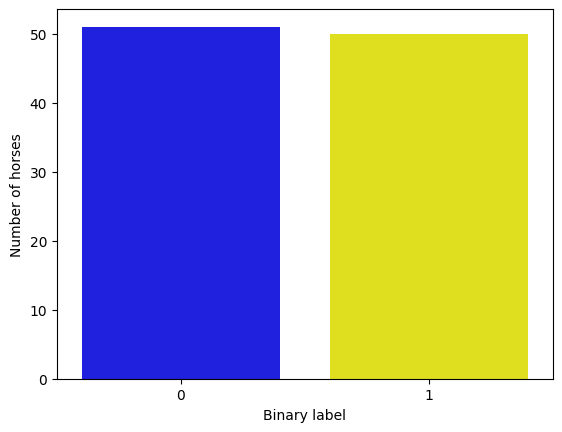

In [8]:
#target features = average of both repetitions (PERSONALITY analysis) of fear tests divided by two classes.
y=fear_max_sum['bin_mean'] 
tt=fear_max_sum['bin_mean'].value_counts()
plt.figure()
sns.barplot(x=tt.index, y=tt, palette=['blue', 'yellow']);
plt.xlabel("Binary label") 
plt.ylabel('Number of horses')

In [9]:
y=y.sort_index()
y.value_counts()

0    51
1    50
Name: bin_mean, dtype: int64

In [10]:
X_initial=pd.concat([all_anatomy_LR, kinematics_all, housing, whorls_of_head, digital_measurment_of_head], axis=1).sort_index()

# the FIRST stage of the study - removing features that correlate with each other 

# empty_list=[]
# # LEFT+front measurements
# corr_list_left=["FH10L", "FH11L", "FH12L", "FH13L", "FH14L", 'FH15L',"FH16L", "FH17L", "FH18L", "FH19L", "FB08", "FB10L", "FB11L", "FB12L", "FB13L", \
#             "FB14L", "FB15L", "FB16L", "FB18L", "FB19L", "FB20L", "FB21L", "FB22L", "FB23L", "FB24L", "FB25L", "FB26L", "FB27L", "FB28L",\
#             "FB29L", "FB31L", "FB32L", "FB34L", "FB35L", "FB36L", "FB37L", "FB38", "FB39", "Trot_Stride lengh",\
#             "Whorl2_Rotation", "Whorl2_Height", "HMPF1", "HMPF2", "HMPF3", "HMPF4", "HMPF6", "HMPF9", "HMPF22", "HMPF23",  "HMPF25", "HMPF27", "HMPF31",\
#             "HMPF34", "HMPF35", "HMPF37", "HMPF39",  "HMPF41", "HMPF43", "HMPF45", "HMPF47", "HMPF49","HMPL2", "HMPL11", "HMPL12","HMPL15"]

# # RIGHT+front measurements
# corr_list_right=["FH10R","FH11R","FH12R","FH13R","FH14R","FH15R","FH16R","FH17R","FH18R","FH19R","FB09","FB10R","FB11R","FB12R","FB13R","FB14R",\
#             "FB15R","FB16R","FB18R","FB19R","FB20R","FB21R","FB22R","FB23R","FB24R","FB25R","FB26R","FB27R","FB28R","FB29R","FB31R",\
#             "FB32R","FB34R","FB35R","FB36R","FB37R","FB39","FB40","Trot_Speed","Whorl2_Height", 'Whorl2_Lateral location',"HMPF2","HMPF3","HMPF5","HMPF7",\
#             "HMPF10","HMPF24","HMPF20", "HMPF21","HMPF26","HMPF30","HMPF32","HMPF33","HMPF36","HMPF38","HMPF40","HMPF42","HMPF44","HMPF46","HMPF48","HMPF71",\
#             "HMPR12","HMPR13","HMPR17"]

# # LEFT + additianal right + front measurements
# corr_list_left_add=["FH10L", "FH11L", "FH12L", "FH13L", "FH14L", "FH15L","FH16L", "FH17L","FH18L", "FH19L", "FB08", "FB10L", "FB11L", "FB12L", "FB13L", \
#             "FB14L","FB15L", "FB16L", "FB18L", "FB19L", "FB20L", "FB21L", "FB22L", "FB23L", "FB24L", "FB25L", "FB26L", "FB27L", "FB28L",\
#             "FB29L", "FB31L", "FB32L", "FB34L", "FB35L", "FB36L", "FB37L", "FB38", "FB39", "Trot_Stride lengh",\
#             "Whorl2_Rotation", "Whorl2_Height", "HMPF1", "HMPF2", "HMPF3", "HMPF4", "HMPF6", "HMPF9", "HMPF22", "HMPF23", "HMPF25", "HMPF27", "HMPF31",\
#             "HMPF34", "HMPF35", "HMPF37", "HMPF39", "HMPF41", "HMPF43", "HMPF45", "HMPF47","HMPF49", "HMPL2", "HMPL11", "HMPL12","HMPL15",\
#             "HMPF24","HMPF32", "HMPF69", "HMPR2", "HMPR11", "HMPR12","HMPR15"] 

# # RIGHT + additianal left + front measurements
# corr_list_right_add=["FH10R","FH11R","FH12R","FH13R","FH14R","FH15R","FH16R","FH17R","FH18R","FH19R","FB09","FB10R","FB11R","FB12R","FB13R","FB14R",\
#             "FB15R","FB16R","FB18R","FB32R","FB19R","FB20R","FB21R","FB22R","FB23R","FB24R","FB25R","FB26R","FB27R","FB28R","FB29R","FB31R",\
#             "FB34R","FB35R","FB36R","FB37R","FB39","FB40","Trot_Speed","Whorl2_Height", 'Whorl2_Lateral location',"HMPF2","HMPF3","HMPF5","HMPF7",\
#             "HMPF10","HMPF24","HMPF20", "HMPF21","HMPF26","HMPF30","HMPF32","HMPF33","HMPF36","HMPF38","HMPF40","HMPF42","HMPF44","HMPF46","HMPF48","HMPF71",\
#             "HMPR13","HMPR12","HMPR17", "FB32L", "HMPF27", "HMPF35",  "HMPL12", "HMPL13", "HMPL17"]    


# #left column of corr matrix
# corr_list_feature1=["FH10L","FH11L","FH12L","FH13L","FH14L","FH15L","FH16L","FH17L", "FH18L","FH19L","FB08","FB10L","FB11L","FB12L","FB13L","FB14L","FB15L","FB16L","FB18L",\
#            "FB19L","FB20L","FB21L","FB22L","FB23L","FB24L","FB25L","FB26L","FB27L","FB28L","FB29L","FB31L","FB32L","FB34L","FB35L","FB36L",\
#            "FB37L","FB38","FB39","Trot_Stride lengh","Whorl2_Rotation", "Whorl2_Height","HMPF1","HMPF2","HMPF3","HMPF4","HMPF6","HMPF9","HMPF20","HMPF21",\
#            "HMPF24", "HMPF25","HMPF26", "HMPF30", "HMPF32", "HMPF33", "HMPF34", "HMPF36", "HMPF38", "HMPF40", "HMPF42", "HMPF44", "HMPF46", "HMPF48","HMPF69",\
#            "HMPL2", "HMPL11", "HMPL12", "HMPL15", "HMPR2", "HMPR11", "HMPR12", "HMPR15"]

# #right column of corr matrix
# corr_list_feature2=["FH10R","FH11R","FH12R","FH13R","FH14R","FH15R","FH16R","FH17R","FH18R","FH19R","FB09","FB10R","FB11R","FB12R","FB13R","FB14R","FB15R",\
#         "FB16R","FB18R",'FB32L',"FB19R","FB20R","FB21R","FB22R","FB23R","FB24R","FB25R","FB26R","FB27R","FB28R","FB29R","FB31R","FB32R","FB34R","FB35R",\
#         "FB36R","FB37R","FB39","FB40","Trot_Speed","Whorl2_Height", 'Whorl2_Lateral location',"HMPF2","HMPF3","HMPF5","HMPF7", "HMPF10","HMPF24","HMPF25","HMPF22","HMPF23",\
#         "HMPF26", "HMPF27","HMPF31", "HMPF33", "HMPF34","HMPF38","HMPF35","HMPF37","HMPF39","HMPF41","HMPF43","HMPF45","HMPF47","HMPF49",\
#         "HMPF71","HMPL13","HMPL12","HMPL17","HMPR13","HMPR12","HMPR17"]

# the SECOND stage of the study - using only important features defined during previous steps
iteration_1=['Age', 'FB01', 'FB02', 'FB06', 'FB09', 'FB11L', 'FB12R', 'FB17L', 'FB20L', 'FB24L', 'FB26L', 'FB28L', 'FB35L', 'FB37R', 'FB40', 'FH05', 'FH09', 'FH15L', 'FH17L', 
                'HMPF1', 'HMPF11', 'HMPF12', 'HMPF13', 'HMPF14', 'HMPF15', 'HMPF16', 'HMPF20', 'HMPF25', 'HMPF4', 'HMPF45', 'HMPF61', 'HMPF62', 'HMPF68', 'HMPF69', 'HMPF74', 'HMPF79',
                 'HMPF8', 'HMPL12', 'HMPL2', 'HMPL4', 'HMPL7', 'HMPL8', 'HMPR12', 'HMPR13', 'HMPR4', 'HMPR8', 'Number of boxes', 'Trot_Cadence', 'Trot_Regularity', 'Trot_Simmetry', 
                 'Walk_Cadence', 'Walk_Propulsion power', 'Walk_Regularity', 'Work']

iteration_2=["Age", "FB26L", "HMPF62", "HMPF45", "HMPF79", "Walk_Cadence", "HMPL12", "FB12R", "FB40", "Walk_Regularity", "HMPL2", "Number of boxes",
    "HMPF68", "FB06", "HMPL4", "HMPR4", "FB35L", "FH09", "FB37R", "Trot_Simmetry", "FH17L", "HMPF13", "HMPF1"]

iteration_3=['Age', 'HMPF79', 'HMPF45', 'FB26L', 'Walk_Regularity', 'HMPL2', 'HMPL4', 'HMPR4', 'FB40', 'FB37R', 'FB35L', 'HMPF13',
'Number of boxes', 'HMPF68', 'HMPL12', 'FH17L', 'FB06', 'HMPF62', 'FB12R', 'HMPF1', 'Walk_Cadence', 'Trot_Simmetry']

iteration_4=[ "FB26L", "HMPL2", "HMPF45", "Walk_Regularity", "HMPF79", "Age", "Number of boxes", "FB40", "FB35L", "Trot_Simmetry",
    "HMPL12", "FB06", "HMPF13", "HMPF62", "Walk_Cadence", "HMPF1", "HMPF68"]

final_iteration = [ "Age", "FB26L", "Number of boxes", "HMPF45", "HMPF79", "HMPF62", "Trot_Simmetry", "HMPL2", "HMPF1", "FB35L", "FB06", "HMPF68", "Walk_Cadence"]
# using of important features identified by DT models with an accuracy > 0.8 determined at the first stage of the study (the above iterations were used sequentially)
remove_bad_features = [item for item in X_initial.columns if item not in final_iteration ]

In [11]:

rs_list=list(range(1,35001))
# 1 stage:             
# full_corr_list=[empty_list, corr_list_left, corr_list_right, corr_list_left_add, corr_list_right_add, corr_list_feature1, corr_list_feature2]

# 2 stage
full_corr_list=[remove_bad_features]

def split_by_hand(Features,goal,number):
    y_test=goal[[number]] #chose a value from y
    X_test=Features.iloc[[number]] #chose a value from X
    y_train=np.delete(np.array(goal),(number)) #remove test_instance from the set
    X_train=Features.drop(Features.index[number]) #remove test_instance from the set
    return X_train, X_test, y_train, y_test

max_acc=0
number_of_horses=len(X_initial)

#loop through different lists of features
for corr_list in full_corr_list:
    X=X_initial.drop(corr_list, axis=1)
    print(len(X.columns))
    max_acc=0
    min_acc=1
    
    #loop by parameters random_state
    for rs in rs_list:
        accuracy_list=[]
        prediction=[]
        selection_features=pd.DataFrame()
        
        #LOO CV loop
        for test_instance in range(number_of_horses):

            X_train, X_test, y_train, y_test=split_by_hand(X,y,test_instance)
            
            DT_model=tree.DecisionTreeClassifier(criterion='gini', random_state=rs, max_features='sqrt') 
            
            DT_model.fit(X_train,y_train) # X_train X_percentile
        
            y_predict=DT_model.predict(X_test)  #DT_model
        
            prediction.append([y_test[0], y_predict[0]])
            if (y_predict[0]==y_test[0]):
                accuracy_list.append(1)
            
            feats=pd.DataFrame(index=X.columns, data=DT_model.feature_importances_, columns=['Important'])#df_scores['features'] , X.columns
            selection_features=pd.concat([selection_features, feats])
        
        if sum(accuracy_list)/number_of_horses>max_acc:
            max_acc=sum(accuracy_list)/number_of_horses
            random_st=rs
        print('Random_state=', rs, "Accuracy=", sum(accuracy_list)/number_of_horses, 'set=', len(X.columns), file=open('DT101_mean_for_the_best.txt', 'a')) 
    print('+++++ Random_state=', random_st, "MAX Accuracy=",max_acc,  'set=', len(X.columns), file=open('DT101_mean_for_the_best.txt', 'a')) 

13


In [12]:
# accuracy for the defined best random_state parameter
print("Accuracy=", max_acc, 'Random state=', random_st)

Accuracy= 0.9108910891089109 Random state= 34071


<Axes: >

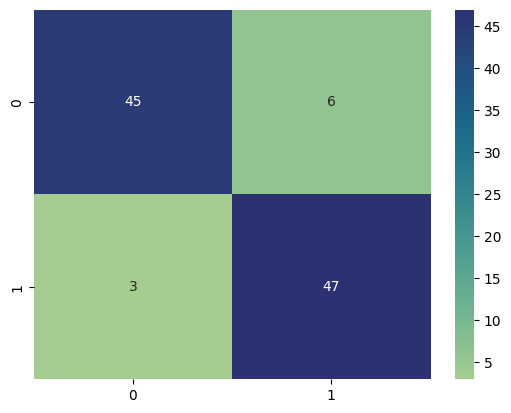

In [13]:
# confusion_matrix for the defined best random_state parameter
prediction=np.array(prediction)
sns.heatmap(confusion_matrix(prediction[:,0], prediction[:,1]), annot=True,cmap="crest")

In [14]:
# precision and recall for the defined best random_state parameter
compare_matrix=confusion_matrix(prediction[:,0], prediction[:,1])
print(compare_matrix)                                        
precision=compare_matrix[1][1]/(compare_matrix[1][1]+compare_matrix[0][1])
print('Precision=', precision)
recall=compare_matrix[1][1]/(compare_matrix[1][1]+compare_matrix[1][0])
print('Recall=', recall)

[[45  6]
 [ 3 47]]
Precision= 0.8867924528301887
Recall= 0.94


In [15]:
selection_features[selection_features['Important']!=0].sort_values('Important')

,Important
Walk_Cadence,0.032000
FB35L,0.044968
FB35L,0.044968
Number of boxes,0.060024
Number of boxes,0.060024
...,...
FB26L,0.292858
FB26L,0.292858
FB26L,0.295782
FB26L,0.295782


Age                101
FB26L              101
FB35L              101
HMPF45             101
HMPF79             101
HMPL2              101
Number of boxes    101
Walk_Cadence         1
dtype: int64


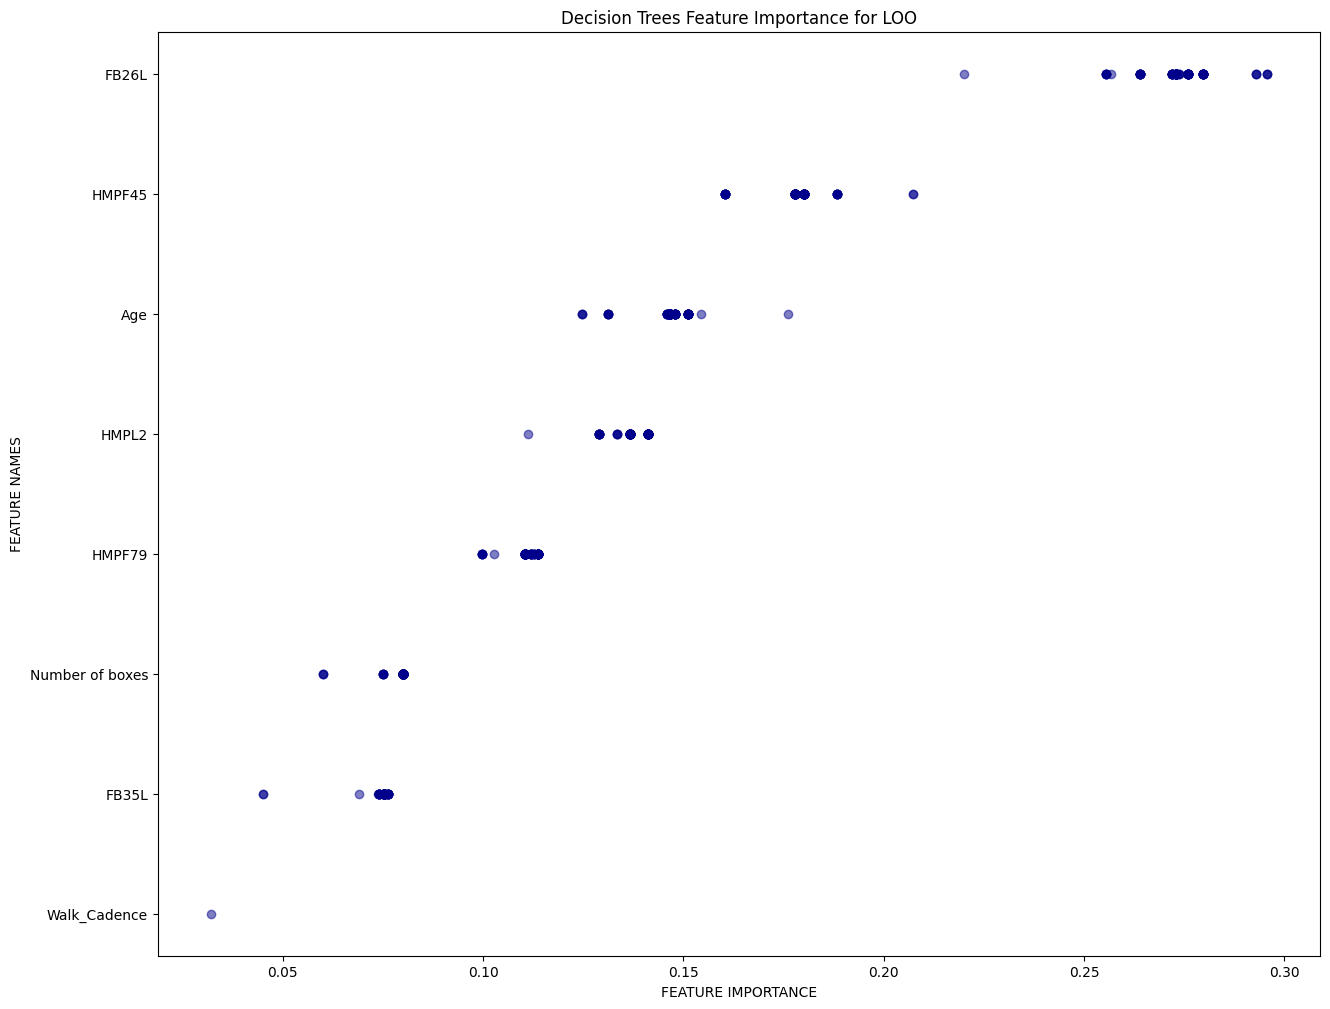

In [16]:

forplot=selection_features[selection_features['Important']!=0].sort_values(['Important'], axis=False)

sf_list=list(forplot.index)
tt=[i for i in sf_list if sf_list.count(i)<0]
unique=list(set(tt))
for i in unique:
    forplot=forplot.drop(i, axis=0)
print(forplot.value_counts(forplot.index))
plt.figure(figsize=(15,12))
plt.scatter(x=forplot['Important'], y=forplot.index, color='darkblue', alpha=0.5)
plt.title('Decision Trees ' + 'Feature Importance for LOO')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES');



In [17]:
# Modeling on the full dataset
X=X_initial.drop(remove_bad_features, axis=1)

DTall_model=DecisionTreeClassifier(criterion='gini',  max_features='sqrt', random_state=34071) #use the best random_state

DTall_model.fit(X,y)
feats_=pd.DataFrame(index=X.columns, data=DTall_model.feature_importances_, columns=['Important'])
features_for_xcl=feats_[feats_['Important']>0].sort_values('Important', ascending=False)
features_for_xcl

,Important
FB26L,0.273228
HMPF45,0.178299
Age,0.146542
HMPL2,0.137441
HMPF79,0.110759
Number of boxes,0.079216
FB35L,0.074516


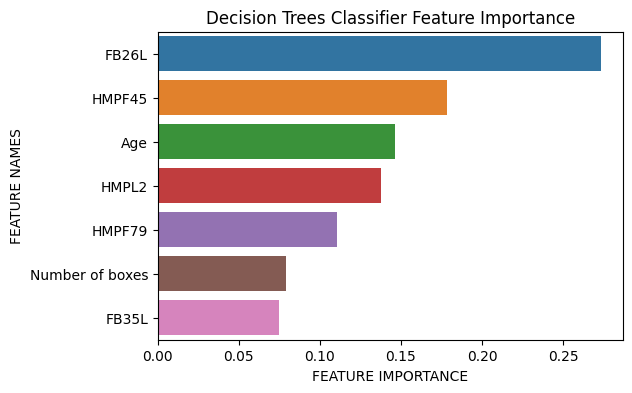

In [18]:
feats_for_plot=feats_[feats_['Important']>0].sort_values('Important', ascending=False)
plt.figure(figsize=(6,4))
#Plot Searborn bar chart
sns.barplot(x=feats_for_plot['Important'], y=feats_for_plot.index)
#Add chart labels
plt.title('Decision Trees Classifier ' + 'Feature Importance')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES');

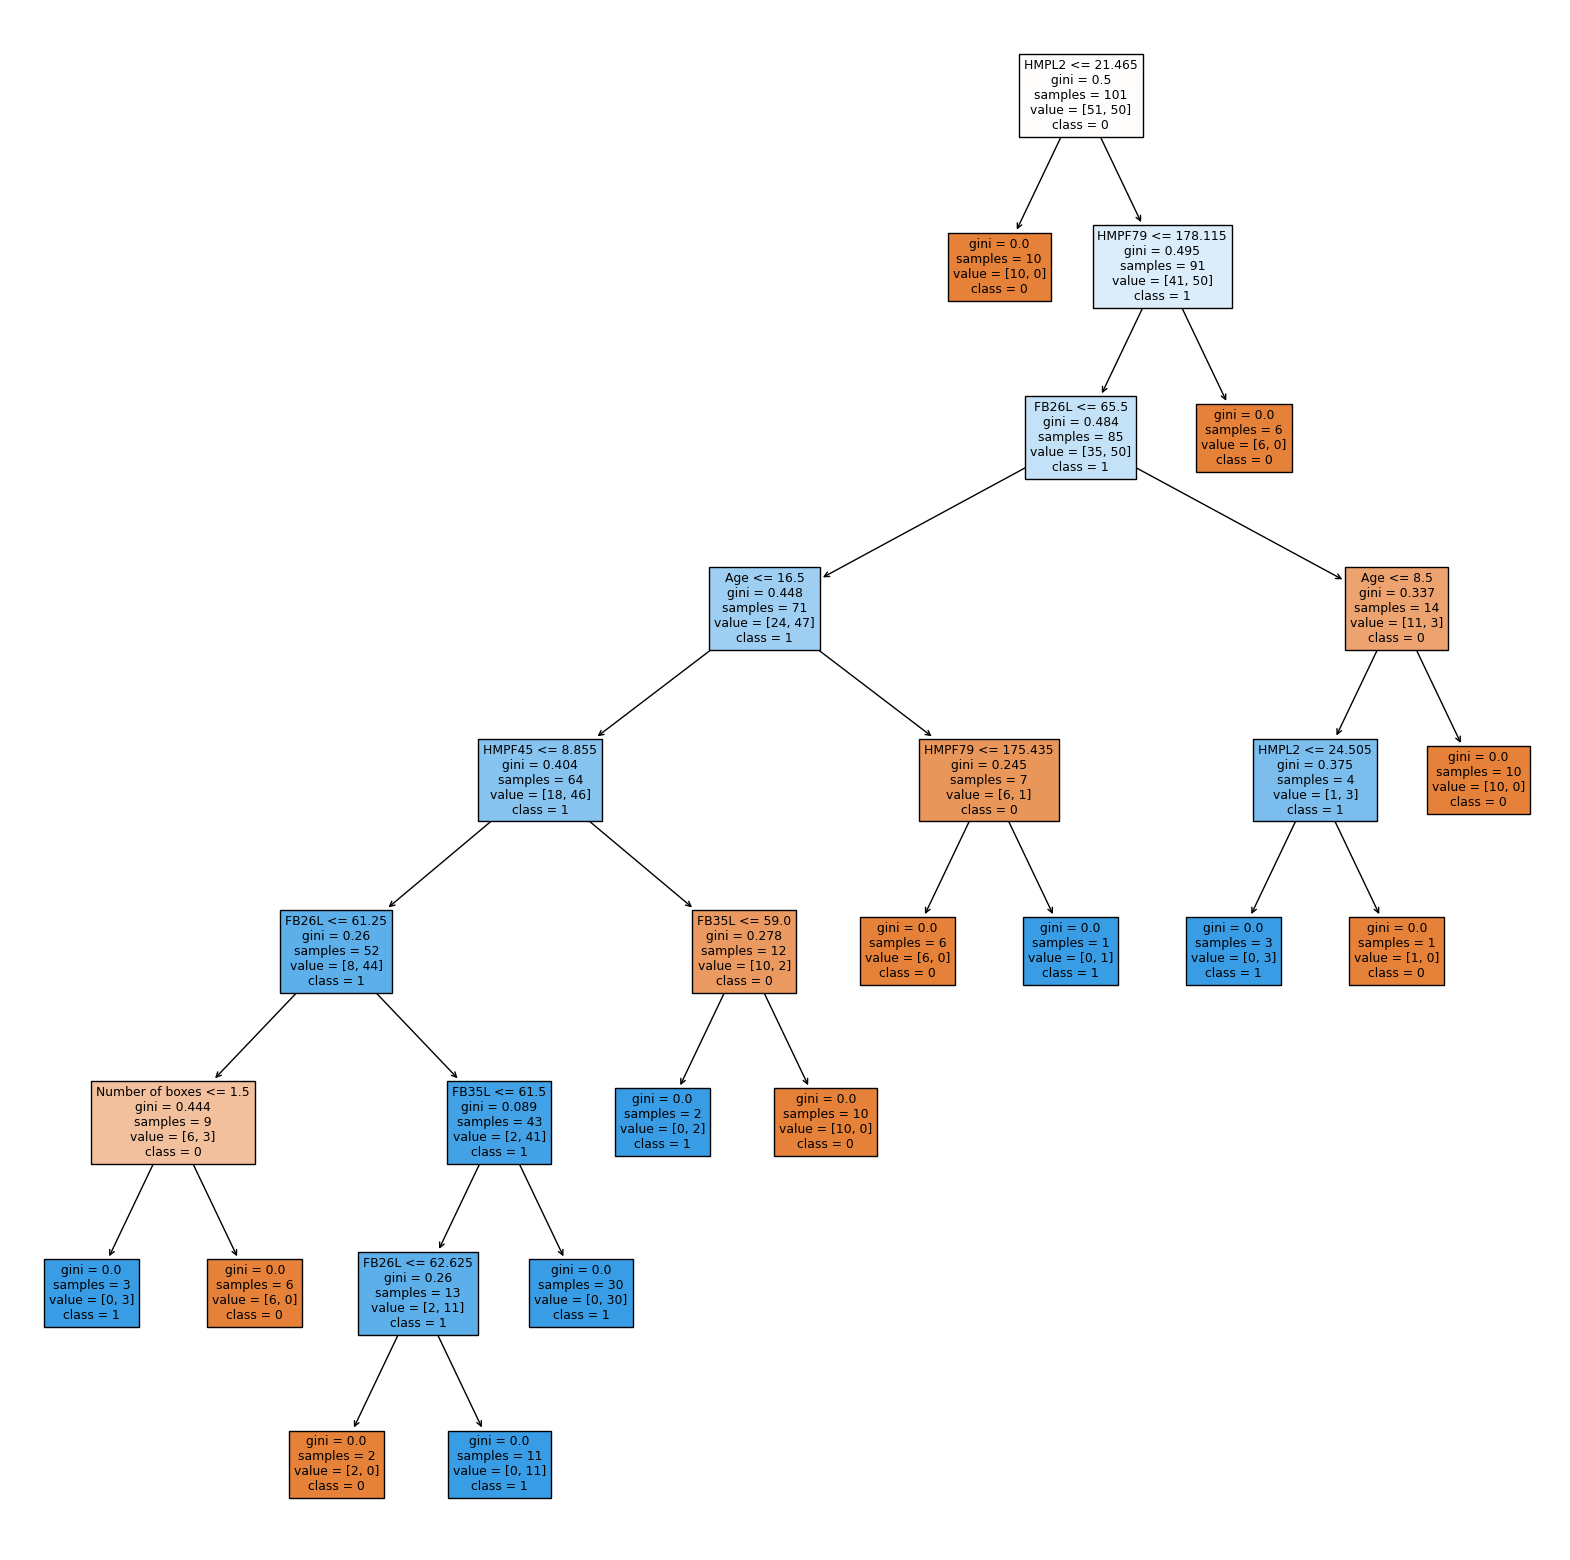

In [19]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(DTall_model, feature_names=feats_.index, class_names='01', filled=True)

In [20]:
tree_text = export_text(DTall_model, feature_names=list(X.columns))
print(tree_text)

|--- HMPL2 <= 21.46
|   |--- class: 0
|--- HMPL2 >  21.46
|   |--- HMPF79 <= 178.11
|   |   |--- FB26L <= 65.50
|   |   |   |--- Age <= 16.50
|   |   |   |   |--- HMPF45 <= 8.86
|   |   |   |   |   |--- FB26L <= 61.25
|   |   |   |   |   |   |--- Number of boxes <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Number of boxes >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- FB26L >  61.25
|   |   |   |   |   |   |--- FB35L <= 61.50
|   |   |   |   |   |   |   |--- FB26L <= 62.62
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- FB26L >  62.62
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- FB35L >  61.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- HMPF45 >  8.86
|   |   |   |   |   |--- FB35L <= 59.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- FB35L >  59.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  16.50
|   |   |   